## PREDICTING NBA SHOTS

In [1]:
# data modeling
import sklearn

# for checking prediction accuracy
from sklearn import metrics

# for evaluating model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# data processing
import numpy as np
import pandas as pd

# data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt

# turn off auto display chart
plt.ioff()

### Reading data, dropping usless tables, size optimisation, splitting into features and labels

In [2]:
# read train, test and split CSV and creating dataframe
train_features = pd.read_csv('train.csv')
val_features = pd.read_csv('val.csv')
test_features = pd.read_csv('test.csv')

# drop all usseless stuff, split into features and labels for each
train_features.drop(['FGM', 'SHOT_RESULT', 'GAME_ID', 'LOCATION', 'W', 'W_DUM', 'GAME_CLOCK', 'SHOT_CLOCK', 'CLOSEST_DEFENDER', 'player_name', 'PTS', 'FINAL_MARGIN', 'player_id', 'CLOSEST_DEFENDER_PLAYER_ID'], axis='columns', inplace=True)
val_features.drop(['FGM', 'SHOT_RESULT', 'GAME_ID', 'LOCATION', 'W', 'W_DUM', 'GAME_CLOCK', 'SHOT_CLOCK', 'CLOSEST_DEFENDER', 'player_name', 'PTS', 'FINAL_MARGIN', 'player_id', 'CLOSEST_DEFENDER_PLAYER_ID'], axis='columns', inplace=True)
test_features.drop(['FGM', 'SHOT_RESULT', 'GAME_ID', 'LOCATION', 'W', 'W_DUM', 'GAME_CLOCK', 'SHOT_CLOCK', 'CLOSEST_DEFENDER', 'player_name', 'PTS', 'FINAL_MARGIN', 'player_id', 'CLOSEST_DEFENDER_PLAYER_ID'], axis='columns', inplace=True)

# change size of each feature for all 3 files
# Train
int_columns = train_features.select_dtypes('integer').columns
float_columns = train_features.select_dtypes('float').columns
train_features[float_columns] = train_features[float_columns].apply(pd.to_numeric, downcast='float')
train_features[int_columns] = train_features[int_columns].apply(pd.to_numeric, downcast='integer')
# val
int_columns = val_features.select_dtypes('integer').columns
float_columns = val_features.select_dtypes('float').columns
val_features[float_columns] = val_features[float_columns].apply(pd.to_numeric, downcast='float')
val_features[int_columns] = val_features[int_columns].apply(pd.to_numeric, downcast='integer')
# Test
int_columns = test_features.select_dtypes('integer').columns
float_columns = test_features.select_dtypes('float').columns
test_features[float_columns] = test_features[float_columns].apply(pd.to_numeric, downcast='float')
test_features[int_columns] = test_features[int_columns].apply(pd.to_numeric, downcast='integer')

# assign split into features and labels
train_labels = train_features['SHOT_RES_DUM']
val_labels = val_features['SHOT_RES_DUM']
test_labels = test_features['SHOT_RES_DUM']

train_features.drop(['SHOT_RES_DUM'], axis='columns', inplace=True)
val_features.drop(['SHOT_RES_DUM'], axis='columns', inplace=True)
test_features.drop(['SHOT_RES_DUM'], axis='columns', inplace=True)

# drop other useless stuff
train_features.drop(['PTS_TYPE', 'LOCATION_DUM', 'DRIBBLES'], axis='columns', inplace=True)
val_features.drop(['PTS_TYPE', 'LOCATION_DUM', 'DRIBBLES'], axis='columns', inplace=True)

# Random Forest

#### Create model + model training



Random forest docs:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

feature importance
https://mljar.com/blog/feature-importance-in-random-forest/

testing with different parameters (and plotting)
https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#:~:text=The%20out%2Dof%2Dbag%20(,whilst%20being%20trained%20%5B1%5D

grid search CV for hyperparameter tuning
GridSearchCV

In [3]:
# Import
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Create model w parameter
rf_model = RandomForestClassifier(n_estimators = 100, class_weight = None, criterion = 'gini'
                                 # max_depth = , min_samples = , min_samples_leaf = , max_leaf_nodes = , min_impurity_decrease = , bootstrap = ,  max_features = ,  oob_score = ,
                                 #random_state = 42
                                )

# training model
rf_model.fit(train_features, train_labels)

RandomForestClassifier()

test with training data

In [5]:
# get predictions + accuracy
train_predictions_rf = rf_model.predict(train_features)

print(f"Accuracy = {metrics.accuracy_score(train_labels, train_predictions_rf):.3f}%")


Accuracy = 0.998%


#### Test with validation data

In [6]:
# get predictions + accuracy
predictions_rf = rf_model.predict(val_features)

print(f"Accuracy = {metrics.accuracy_score(val_labels, predictions_rf):.3f}%")

Accuracy = 0.629%


#### Feature importance

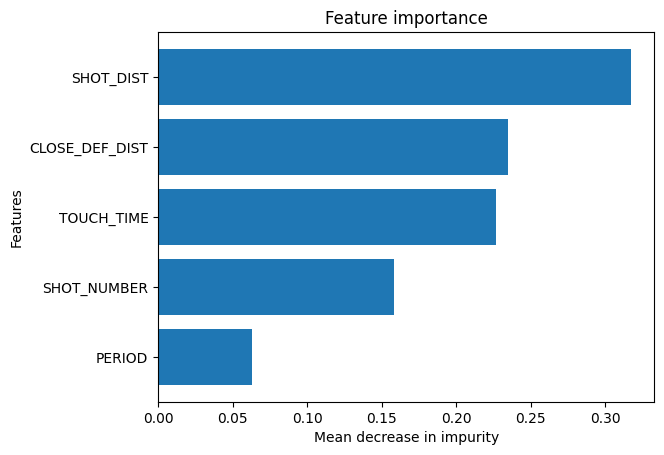

In [7]:
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(train_features.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.ylabel("Features")
plt.xlabel("Mean decrease in impurity")
plt.title("Feature importance")
plt.show()

#### Evaluation (Random Forest)

In [8]:
# Print classification report
print(classification_report(val_labels, predictions_rf))

# print ROC AUC score
print (f"\nAUC: {metrics.roc_auc_score(val_labels, predictions_rf):.3f}")

              precision    recall  f1-score   support

           0       0.62      0.65      0.64      8955
           1       0.63      0.61      0.62      8937

    accuracy                           0.63     17892
   macro avg       0.63      0.63      0.63     17892
weighted avg       0.63      0.63      0.63     17892


AUC: 0.629


Confusion matrix

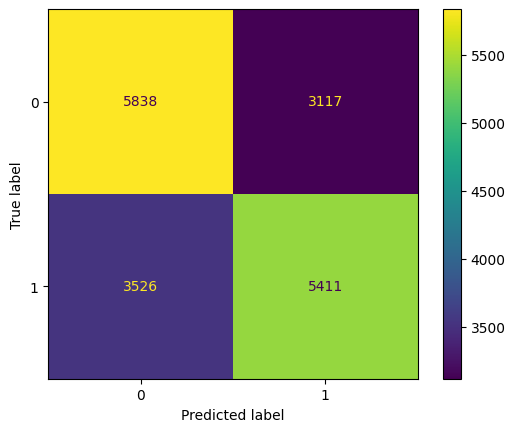

In [12]:
# Plot the confusion matrix in graph
cm = confusion_matrix(val_labels,predictions_rf, labels=rf_model.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, train_features, train_labels, cv = 10)

print(scores)


KeyboardInterrupt: 

## Testing with different parameters

In [ ]:
min_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]

test_list = []

for min in min_samples:
  # make a dict
  dict = {}
  # build a model with different number of trees
  rf_model = RandomForestClassifier(n_estimators = 100, class_weight = None, criterion = "gini",
                                # max_depth = depth, max_features = , min_samples_leaf = , min_impurity_decrease = , min_samples_leaf = , max_leaf_nodes = , oob_score = , bootstrap = , 
                                #random_state = 42,
                                )
  # train model
  rf_model.fit(train_features, train_labels)
  # make predictions
  predictions_rf = rf_model.predict(val_features)
  
  # store values & append 
  dict["min_samples"] = min
  dict["Acc/AUC"] = format(metrics.accuracy_score(val_labels, predictions_rf), ".3f")
  dict["F1 score"] = format(metrics.f1_score(val_labels, predictions_rf), ".3f")
  
  test_list.append(dict)

for dict in test_list:
  print(dict)

KeyboardInterrupt: 

# XGBOOST

youtube vid
https://www.youtube.com/watch?v=rMeq9khzdvM

In [ ]:
import xgboost

In [ ]:
# INSTANTIATE MODEL WITH PARAMETERS
xgboost_model = xgboost.XGBClassifier(
                          learning_rate=0.1, n_estimators = 100, subsample=0.5,
                          colsample_bytree = 0.5, eval_metric = 'auc',
                          verbosity=0
                          )


# Model parameters
# learning rate -- the weightage of every tree in the classifier
# max depth -- max depth of each tree in the xgb model
# n_estimators -- the maximum number of trees the model will create
# subsample -- the % of data in the sample that will get randomly selected for creating an individual tree in the observation (helps prevent overfitting) 
# colsample_bytree -- specifies % of total number of features to use 
# eval_metric = 'auc'

# SPECIFYING EVALUATION DATA SET
eval_set = [(val_features, val_labels)]


# TRAIN MODEL
xgboost_model.fit(train_features, train_labels,
                  early_stopping_rounds = 10,
                  eval_set = eval_set,
                  verbose = False)


# Model training parameters
# early stopping rounds -- the input x. Says that if the model performance on the validation data set does not change for 10 iterations, no new tree will be built 

c:\Users\hong\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# make prediction using xgboost
predictions_xgb = xgboost_model.predict(val_features)

from sklearn import metrics
print(f"Accuracy = {metrics.accuracy_score(val_labels, predictions_xgb)}")

Accuracy = 0.5954616588419406


### Feature importance

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

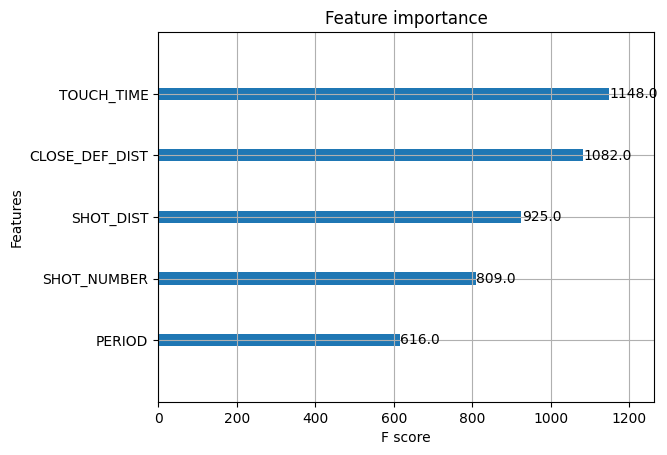

In [ ]:
from xgboost import plot_importance

plot_importance(xgboost_model)

# ADABOOST

youtube vid
https://www.youtube.com/watch?v=rMeq9khzdvM

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# INSTANTIATE MODEL WITH PARAMETERS
adaboost_model = AdaBoostClassifier(n_estimators = 100,
                                    learning_rate = 1)

#n_estimators -- number of weak learners to train iteratively
# learning_rate -- contributes to the weights of weak learners

In [ ]:
# train adaboost classifer
adaboost_model.fit(train_features, train_labels)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [ ]:
# Make prediction

# make prediction using xgboost
predictions_ada = adaboost_model.predict(val_features)

from sklearn import metrics
print(f"Accuracy = {metrics.accuracy_score(val_labels, predictions_ada)}")

Accuracy = 0.5924994410909904


Evaluation

In [ ]:
# Print classification report
print(classification_report(val_labels, predictions_ada))

# print ROC AUC score
print (f"\nAUC: {metrics.roc_auc_score(val_labels, predictions_ada):.3f}")

              precision    recall  f1-score   support

           0       0.58      0.67      0.62      8955
           1       0.61      0.52      0.56      8937

    accuracy                           0.59     17892
   macro avg       0.59      0.59      0.59     17892
weighted avg       0.59      0.59      0.59     17892


AUC: 0.592


# Ensemble

In [ ]:
print(len(predictions_rf))
print(len(predictions_xgb))
print(len(predictions_ada))
print(len(val_labels))

17892
17892
17892
17892


In [ ]:
# get new predictions by aggregating all 3
predictions_ensemble = []

for i, pred in enumerate(predictions_rf):
  item = (predictions_rf[i] + predictions_xgb[i] + predictions_ada[i])
  
  if (item == 0):
    item = 0
  elif (item == 1):
    item = 0
  elif (item == 2):
    item = 1
  elif (item == 3):
    item = 1
  
  predictions_ensemble.append(item)

evaluate

In [ ]:
print(f"Accuracy = {metrics.accuracy_score(val_labels, predictions_ensemble)}")

Accuracy = 0.6016655488486474
